# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [16]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 1.6 Implement the solution for $\mathbf{w}$.

In [17]:
x1, y1, x2, y2 = 0.0, 1.0, 2.0, 5.0
X = np.array([[1, x1], [1, x2]])
y = np.array([y1, y2])
w = np.linalg.solve(X, y)
print(w)


[1. 2.]


## 2.1 Plot $y = -3x^2 + 72x + 70$.

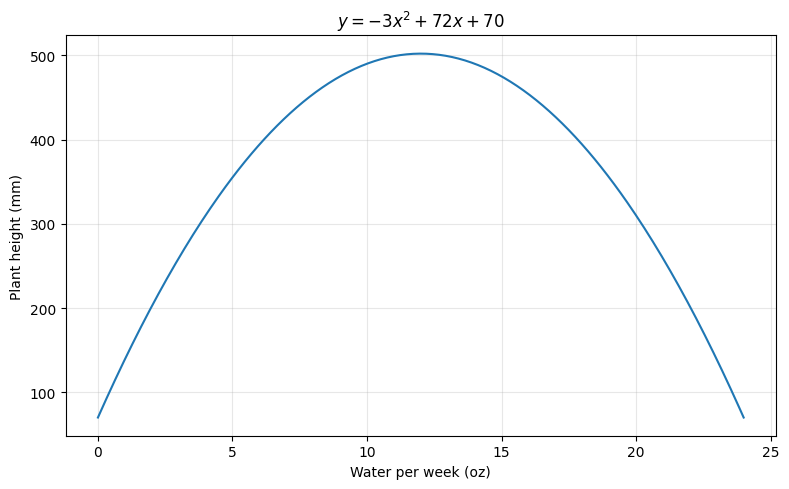

In [18]:
x = np.linspace(0, 24, 300)
y = -3 * x**2 + 72 * x + 70
plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.xlabel('Water per week (oz)')
plt.ylabel('Plant height (mm)')
plt.title(r'$y = -3x^2 + 72x + 70$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

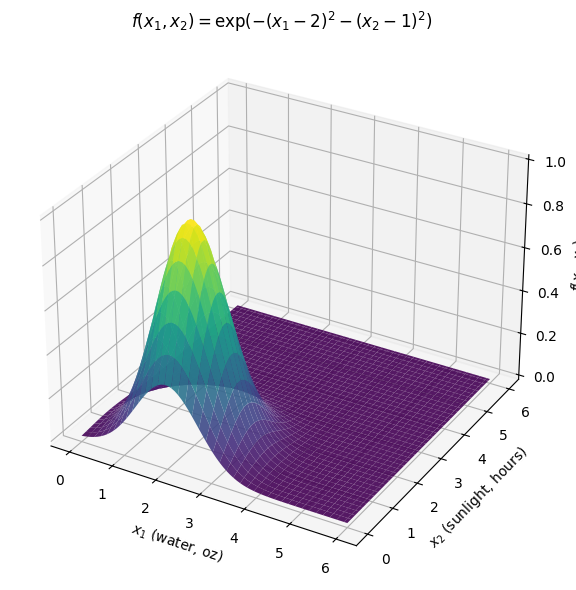

In [19]:
x1 = np.linspace(0, 6, 80)
x2 = np.linspace(0, 6, 80)
X1, X2 = np.meshgrid(x1, x2)
f = np.exp(-(X1 - 2)**2 - (X2 - 1)**2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, f, cmap='viridis', alpha=0.9)
ax.set_xlabel(r'$x_1$ (water, oz)')
ax.set_ylabel(r'$x_2$ (sunlight, hours)')
ax.set_zlabel(r'$f(x_1, x_2)$, ')
ax.set_title(r'$f(x_1, x_2) = \exp(-(x_1-2)^2 - (x_2-1)^2)$')
plt.tight_layout()
plt.show()

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

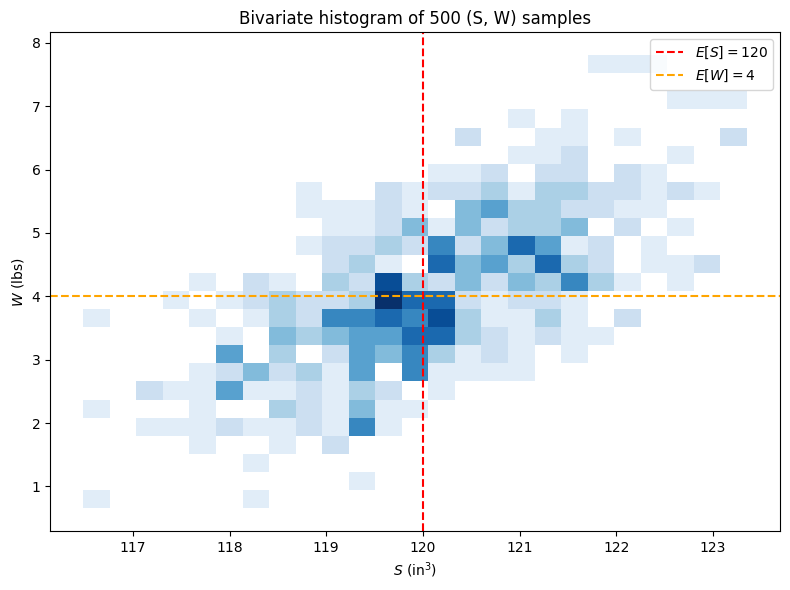

Sample mean (S, W): (np.float64(120.09118436552336), np.float64(4.0541635571931725))


In [20]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])
dist_sw = mvn(mu, Sigma)
samples = dist_sw.rvs(size=500)
S_samples, W_samples = samples[:, 0], samples[:, 1]

plt.figure(figsize=(8, 6))
sns.histplot(x=S_samples, y=W_samples, bins=25, cmap='Blues')
plt.axvline(120, color='red', linestyle='--', label=r'$E[S]=120$')
plt.axhline(4, color='orange', linestyle='--', label=r'$E[W]=4$')
plt.xlabel(r'$S$ (in$^3$)')
plt.ylabel(r'$W$ (lbs)')
plt.title('Bivariate histogram of 500 (S, W) samples')
plt.legend()
plt.tight_layout()
plt.show()

print('Sample mean (S, W):', (S_samples.mean(), W_samples.mean()))

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

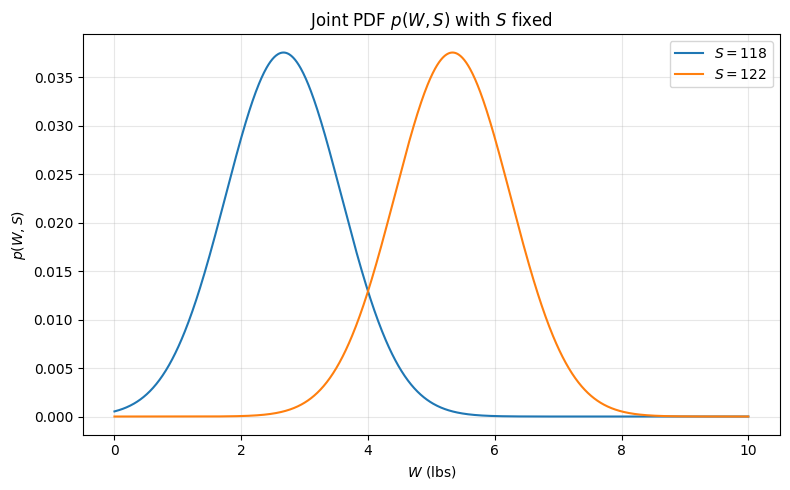

In [21]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1], [1, 1.5]])
dist_sw = mvn(mu, Sigma)

W_vals = np.linspace(0, 10, 1001)
pdf_S118 = np.array([dist_sw.pdf([118, w]) for w in W_vals])
pdf_S122 = np.array([dist_sw.pdf([122, w]) for w in W_vals])

plt.figure(figsize=(8, 5))
plt.plot(W_vals, pdf_S118, label=r'$S = 118$')
plt.plot(W_vals, pdf_S122, label=r'$S = 122$')
plt.xlabel(r'$W$ (lbs)')
plt.ylabel(r'$p(W, S)$')
plt.title(r'Joint PDF $p(W, S)$ with $S$ fixed')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [22]:
def simulate_T_star(mu_sw=np.array([120, 4]), Sigma_sw=np.array([[1.5, 1], [1, 1.5]]), lam=3, n=24):
    N = np.sum(np.random.poisson(lam, size=n))
    dist_sw = mvn(mu_sw, Sigma_sw)
    samples_sw = dist_sw.rvs(size=N)
    S = samples_sw[:, 0]
    W = samples_sw[:, 1]
    eps = np.random.normal(0, np.sqrt(5), size=N)
    T = 60 + 0.6 * W + 0.2 * S + eps
    return np.sum(T)

# One sample
print('One draw of T*:', simulate_T_star())

One draw of T*: 6623.746232993849


## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [23]:
np.random.seed(42)
T_star_samples = np.array([simulate_T_star() for _ in range(1000)])
print('Estimated E[T*]:', T_star_samples.mean())
print('Estimated Std[T*]:', T_star_samples.std())

Estimated E[T*]: 6230.618820032123
Estimated Std[T*]: 710.5600821468321


# 4.1: Examining the Data

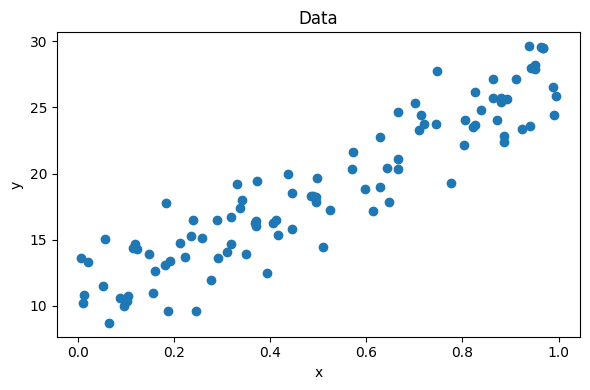

In [24]:
# Steve's solution fixed
data = pd.read_csv("data/points.csv").values
# Data has shape (n, 2)
x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.tight_layout()
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [25]:
# Steve's solution fixed
# We need columns, so we reshape to (n, 1) so that hstack gives (n, 2).
intercept = np.ones(x.shape[0]).reshape(-1, 1)
X = np.hstack([intercept, x.reshape(-1, 1)])

print('y.shape:', y.shape)
print('X.shape:', X.shape)

y.shape: (100,)
X.shape: (100, 2)


## 4.4: Implementing the LinearRegression Class

In [26]:
# Steve's solution fixed
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

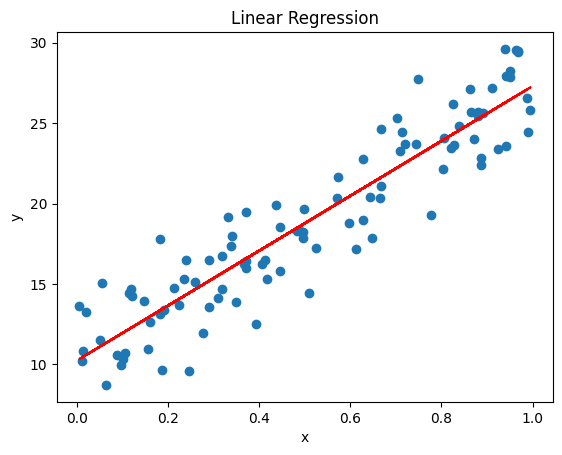

In [27]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [28]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print('MSE (loop):', mse)

# Vectorized MSE
mse_vec = np.mean((y - y_pred) ** 2)
print('MSE (vectorized):', mse_vec)

MSE (loop): 4.439331220193986
MSE (vectorized): 4.439331220193986
